In [68]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [70]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [71]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [72]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.15, random_state=101)

In [73]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.15, random_state=101)

In [74]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [75]:
model = Sequential()
model.add(layers.GRU(250))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [76]:
gru = model.fit(xtrain, ytrain,validation_data=(xtest, ytest), batch_size=32,epochs=75)

Epoch 1/75
8/8 [==============================] - 5s 147ms/step - loss: 0.7629 - accuracy: 0.5854 - f1_score: 0.4693 - precision_5: 0.4267 - recall_5: 0.8485 - val_loss: 0.5565 - val_accuracy: 0.9474 - val_f1_score: 0.9375 - val_precision_5: 0.5634 - val_recall_5: 0.5936
Epoch 2/75
8/8 [==============================] - 0s 33ms/step - loss: 0.6052 - accuracy: 0.7948 - f1_score: 0.5700 - precision_5: 0.5949 - recall_5: 0.5663 - val_loss: 0.4549 - val_accuracy: 0.9474 - val_f1_score: 0.9375 - val_precision_5: 0.6698 - val_recall_5: 0.5627
Epoch 3/75
8/8 [==============================] - 0s 36ms/step - loss: 0.5502 - accuracy: 0.8032 - f1_score: 0.6034 - precision_5: 0.6741 - recall_5: 0.5605 - val_loss: 0.3716 - val_accuracy: 0.9474 - val_f1_score: 0.9375 - val_precision_5: 0.7175 - val_recall_5: 0.5595
Epoch 4/75
8/8 [==============================] - 0s 33ms/step - loss: 0.5092 - accuracy: 0.8234 - f1_score: 0.6578 - precision_5: 0.7232 - recall_5: 0.5631 - val_loss: 0.3395 - val_accu

In [77]:
prediction=(model.predict(xpred) > 0.5).astype("int32")

In [78]:
prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [79]:
ypred

280    0
157    0
209    0
78     0
230    1
208    0
4      1
Name: DEATH_EVENT, dtype: int64

In [80]:
 score = model.evaluate(xpred,  ypred, verbose=2)

print('\nEvaluation:', score)

1/1 - 0s - loss: 0.3435 - accuracy: 0.8571 - f1_score: 0.6667 - precision_5: 0.8464 - recall_5: 0.6519

Evaluation: [0.34347468614578247, 0.8571428656578064, 0.666666567325592, 0.8464370965957642, 0.6518718004226685]


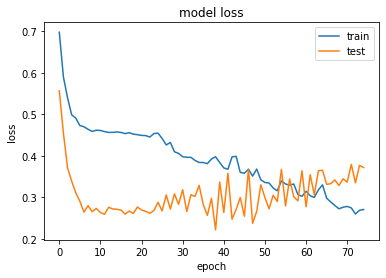

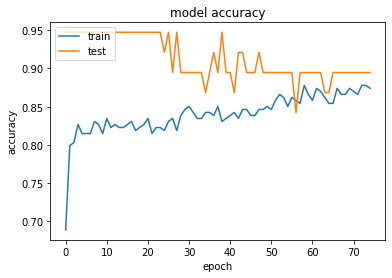

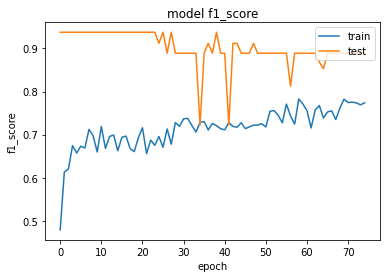

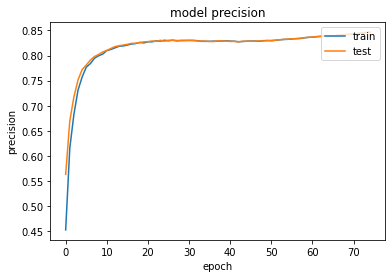

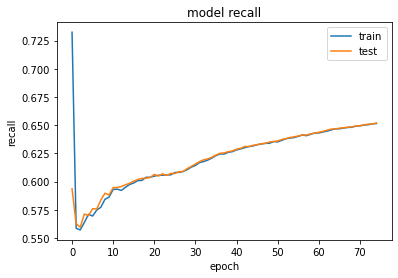

In [82]:
plt.plot(gru.history['loss'])
plt.plot(gru.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(gru.history['accuracy'])
plt.plot(gru.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(gru.history['f1_score'])
plt.plot(gru.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(gru.history['precision_5'])
plt.plot(gru.history['val_precision_5'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(gru.history['recall_5'])
plt.plot(gru.history['val_recall_5'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()